# Midterm Project Messy Work
*Matthew Ueckermann*


## Importing the data

Can import one year as:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  scipy import stats 
import time

df_2019 = pd.read_csv('https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/2019/fname/TRI_2019_US.csv/CSV',low_memory=False)
# to scrape later, do in for loop. Add time delay for politenes

print("done")

done


In [2]:
df_2019.head()

1. YEAR         2. TRIFD     3. FRS ID  \
0     2019  77015FRMNT2239H  110000460965   
1     2019  2974WCMSTL6371C  110040511407   
2     2019  77015FRMNT2239H  110000460965   
3     2019  5535WTCHTC1PREC  110031294882   
4     2019  51031WLLSD11911  110000414034   

                              4. FACILITY NAME   5. STREET ADDRESS  \
0                           GB BIOSCIENCES LLC       2239 HADEN RD   
1                                 CM STEEL INC  6371 CAMPBELL ROAD   
2                           GB BIOSCIENCES LLC       2239 HADEN RD   
3                                TECH-ETCH INC      1 PRECISION DR   
4  WELLS ENTERPRISES INC SOUTH ICE CREAM PLANT     1191 18TH ST SW   

      6. CITY 7. COUNTY 8. ST  9. ZIP  10. BIA  ...  \
0     HOUSTON    HARRIS    TX   77015      NaN  ...   
1        YORK      YORK    SC   29745      NaN  ...   
2     HOUSTON    HARRIS    TX   77015      NaN  ...   
3  LITCHFIELD    MEEKER    MN   55355      NaN  ...   
4     LE MARS  PLYMOUTH    IA   51031      NaN  ...   

  108. 8.3 - ENERGY RECOVER OF  109. 8.4 - RECYCLING ON SITE  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   110. 8.5 - RECYCLING OFF SIT 111. 8.6 - TREATMENT ON SITE  \
0                           0.0                         11.0   
1                       30200.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                     156541.0   

  112. 8.7 - TREATMENT OFF SITE 113. PRODUCTION WSTE (8.1-8.7)  \
0                           0.0                         214.10   
1                           0.0                       30225.40   
2                           0.0                       13395.01   
3                           0.0                           0.00   
4                           0.0                      156541.00   

  114. 8.8 - ONE-TIME RELEASE 115. PROD_RATIO_OR_ ACTIVITY  \
0                         NaN                   PRODUCTION   
1                         NaN                   PRODUCTION   
2                         NaN                   PRODUCTION   
3                         NaN                          NaN   
4                         NaN                   PRODUCTION   

   116. 8.9 - PRODUCTION RATIO Unnamed: 116  
0                         0.00          NaN  
1                         1.20          NaN  
2                         0.00          NaN  
3                          NaN          NaN  
4                         0.97          NaN  

[5 rows x 117 columns]

In [3]:
# Want to select/keep only the data that we care about:
#df_2019_trimmed = df_2019[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","38. CLEAN AIR ACT CHEMICAL","39. CLASSIFICATION","40. METAL","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","46. 5.2 - STACK AIR","47. 5.3 - WATER","51. 5.5.1 - LANDFILLS","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","88. OFF-SITE RECYCLED TOTAL","101. TOTAL RELEASES","113. PRODUCTION WSTE (8.1-8.7)","114. 8.8 - ONE-TIME RELEASE","115. PROD_RATIO_OR_ ACTIVITY","116. 8.9 - PRODUCTION RATIO"]]

df_2019_trimmed = df_2019[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]
# this probably covers more than I'll actually use, but I think the rest of the columns are too much for me....

del df_2019

In [4]:
df_2019_trimmed.head()

1. YEAR         2. TRIFD 8. ST     15. PARENT CO NAME 20. INDUSTRY SECTOR  \
0     2019  77015FRMNT2239H    TX          SYNGENTA CORP           Chemicals   
1     2019  2974WCMSTL6371C    SC                    NaN   Fabricated Metals   
2     2019  77015FRMNT2239H    TX          SYNGENTA CORP           Chemicals   
3     2019  5535WTCHTC1PREC    MN          TECH ETCH INC   Fabricated Metals   
4     2019  51031WLLSD11911    IA  WELLS ENTERPRISES INC                Food   

         34. CHEMICAL 39. CLASSIFICATION 42. CARCINOGEN  \
0    Hydrogen cyanide                TRI             NO   
1              Nickel                TRI            YES   
2  Vanadium compounds                TRI             NO   
3            Chlorine                TRI             NO   
4         Nitric acid                TRI             NO   

   45. 5.1 - FUGITIVE AIR  59. ON-SITE RELEASE TOTAL  \
0                     0.0                       0.00   
1                    25.4                      25.40   
2                     1.0                     264.57   
3                     0.0                       0.00   
4                     0.0                       0.00   

   82. OFF-SITE RELEASE TOTAL  101. TOTAL RELEASES  \
0                      203.10               203.10   
1                        0.00                25.40   
2                    13130.44             13395.01   
3                        0.00                 0.00   
4                        0.00                 0.00   

   116. 8.9 - PRODUCTION RATIO  
0                         0.00  
1                         1.20  
2                         0.00  
3                          NaN  
4                         0.97

In [5]:
## time to scrape!
df = df_2019_trimmed

for x in range(1987,2019):
    address = 'https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/'+str(x)+'/fname/TRI_'+str(x)+'_US.csv/CSV'
    df_new = pd.read_csv(address,low_memory=False)
    
    df_new_trimmed = df_new[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","46. 5.2 - STACK AIR","47. 5.3 - WATER","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]

    df = df.append(df_new_trimmed, ignore_index=True)
    del df_new
    time.sleep(2)

In [6]:
df.tail(1) # seems like we have everything imported/scraped...

1. YEAR         2. TRIFD 8. ST             15. PARENT CO NAME  \
2820093     2018  37066STVGL1499S    TN  US TENNESSEE VALLEY AUTHORITY   

        20. INDUSTRY SECTOR      34. CHEMICAL 39. CLASSIFICATION  \
2820093  Electric Utilities  Copper compounds                TRI   

        42. CARCINOGEN  45. 5.1 - FUGITIVE AIR  59. ON-SITE RELEASE TOTAL  \
2820093             NO                     2.0                    54143.0   

         82. OFF-SITE RELEASE TOTAL  101. TOTAL RELEASES  \
2820093                         0.0              54143.0   

         116. 8.9 - PRODUCTION RATIO  46. 5.2 - STACK AIR  47. 5.3 - WATER  
2820093                         0.98                140.0           2900.0

## Lets start understanding the data that we have

Want to see general structure of the TRI, see if anything interesting pops up

In [7]:
df["34. CHEMICAL"].value_counts()

Toluene                        100742
Zinc compounds                  97595
Lead                            96018
Xylene (mixed isomers)          94743
Ammonia                         89116
                                ...  
alpha-Hexachlorocyclohexane         1
C.I. Direct Brown 95                1
Methyleugenol                       1
Fenoxaprop-ethyl                    1
p-Chlorophenyl isocyanate           1
Name: 34. CHEMICAL, Length: 630, dtype: int64

In [8]:
df["15. PARENT CO NAME"].value_counts()

KOCH INDUSTRIES INC         29057
MARATHON PETROLEUM CORP     22320
BERKSHIRE HATHAWAY INC      21509
CLEAN HARBORS INC           21062
EXXON MOBIL CORP            17558
                            ...  
AVTRON MANUFACTURING INC        1
LOROA CORP                      1
IDX CORP                        1
ROGERS FOAM CORP                1
COCA-COLA EXPORT CORP           1
Name: 15. PARENT CO NAME, Length: 13779, dtype: int64

In [9]:
df["8. ST"].value_counts()

TX    252763
OH    195849
CA    156309
IL    151368
PA    147183
IN    121460
MI    115954
WI     96368
NC     90790
LA     86373
GA     83156
NY     81838
TN     75586
AL     71531
MO     69280
NJ     68791
SC     67456
KY     63910
FL     59112
VA     54112
MN     51301
IA     51067
MA     50721
AR     47264
MS     38862
OK     38765
KS     37435
WA     37000
CT     34510
OR     29402
WV     29129
AZ     27060
UT     24432
MD     23214
CO     23080
NE     22636
PR     16272
NV     12893
ME     12861
RI     12348
NH     12165
ID      9828
NM      9358
DE      9244
MT      8752
WY      8263
ND      7952
SD      7687
AK      5258
HI      5047
VT      3642
VI      1495
GU       846
MP       618
DC       403
AS        95
Name: 8. ST, dtype: int64

In [10]:
df["2. TRIFD"].value_counts()

90749RCPRD1801E    4018
43920VNRLL1250S    3932
71730NVRNM309AM    3879
77643WSTMNHWY73    3715
77541THDWCBUILD    3577
                   ... 
33445HRDRV2350S       1
01833BMNGNCARLE       1
49126CMSTC4125P       1
95134SDLNC80ROS       1
43302TDCDV1332F       1
Name: 2. TRIFD, Length: 61113, dtype: int64

In [11]:
# Group by values more interesting though...
df.groupby(["34. CHEMICAL","1. YEAR"])["101. TOTAL RELEASES"].sum()

34. CHEMICAL                                    1. YEAR
1,1,1,2-Tetrachloro-2-fluoroethane (HCFC-121a)  1997       19701.00
                                                1998       23276.00
                                                2000       27200.00
                                                2005           0.00
                                                2006           8.23
                                                             ...   
trans-1,4-Dichloro-2-butene                     2015           1.84
                                                2016          16.54
                                                2017          52.00
                                                2018          23.00
                                                2019           9.00
Name: 101. TOTAL RELEASES, Length: 14949, dtype: float64

### Some very general trends

<AxesSubplot:xlabel='1. YEAR'>

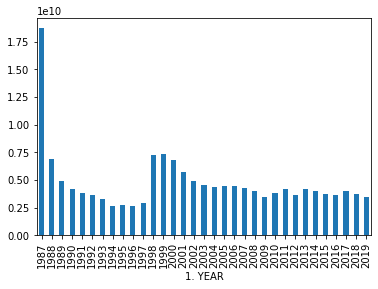

In [12]:
# Lets just look at total chemical releases by year. See if there's anything there
import seaborn as sns
import matplotlib.pyplot as plt

sumEmm_year = df.groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()

sumEmm_year.plot(kind='bar')
#not super exciting, might be able to attribute first decrease to the creation of the TRI, but probs not more

<AxesSubplot:xlabel='1. YEAR'>

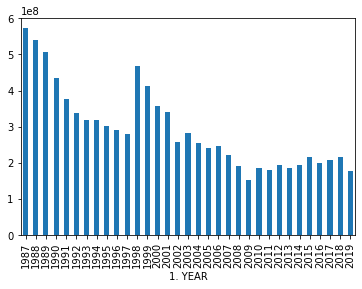

In [13]:
# Continue, but lets look at specific bad chemcials, starting with carcinogens

sumCarcinogens_year = df[df["42. CARCINOGEN"]=="YES"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumCarcinogens_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

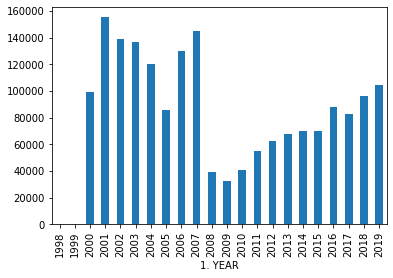

In [14]:
# Dioxins

sumDiox_year = df[df["39. CLASSIFICATION"]=="Dioxin"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumDiox_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

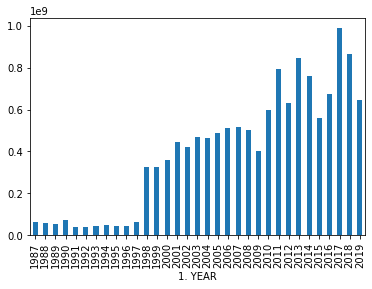

In [15]:
# PBTs

sumPBT_year = df[df["39. CLASSIFICATION"]=="PBT"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumPBT_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

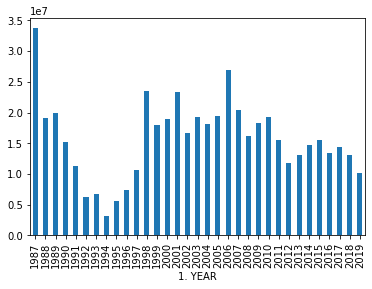

In [16]:
# So obviously, PBT/dioxin usage not decreasing... Is this due to addition of new compounds, or just greater use?

# Lets take some example PBTs

# lead
sumLead_year = df[df["34. CHEMICAL"]=="Lead"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumLead_year.plot(kind='bar')

# looks like they added more industries in 199 time, a well as more PBTs..

In [17]:
df["20. INDUSTRY SECTOR"].value_counts()
#  Wow this is a lot. Really only had chemicals/petroleum in my mind

Chemicals                            702194
Fabricated Metals                    301374
Primary Metals                       231126
Transportation Equipment             173953
Petroleum                            157776
Electric Utilities                   125001
Food                                 119210
Plastics and Rubber                  106415
Machinery                            104414
Nonmetallic Mineral Product          101383
Paper                                 96064
Petroleum Bulk Terminals              92945
Computers and Electronic Products     82813
Chemical Wholesalers                  61762
Electrical Equipment                  57964
Wood Products                         57774
Hazardous Waste                       57367
Other                                 40268
Furniture                             38063
Miscellaneous Manufacturing           35646
Textiles                              17507
Printing                              16180
Metal Mining                    

<AxesSubplot:xlabel='20. INDUSTRY SECTOR'>

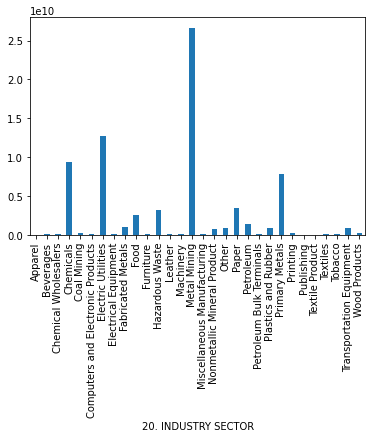

In [18]:
#Lets look at the magnitude...
sumChem_industry = df[df["1. YEAR"]>2001].groupby(["20. INDUSTRY SECTOR"])["101. TOTAL RELEASES"].sum()
sumChem_industry.plot(kind="bar")

Text(0, 0.5, 'Total chemicals emmited (Mlb)')

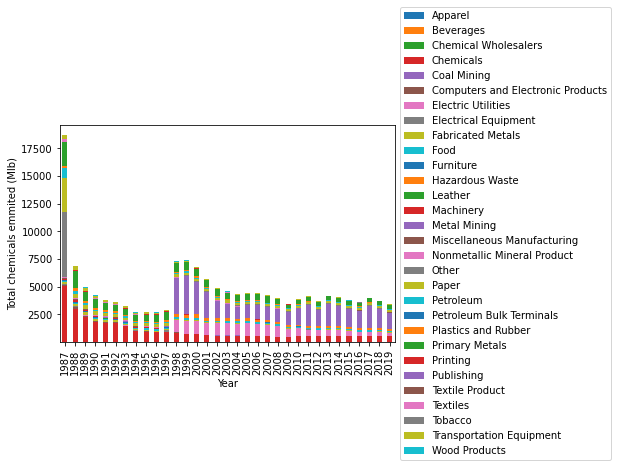

In [62]:
sumChem_byIndustry_year = df.groupby(["1. YEAR","20. INDUSTRY SECTOR"])["101. TOTAL RELEASES"].sum()*10**-6
sumChem_byIndustry_year.unstack(level=1).plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.xlabel("Year")
plt.ylabel("Total chemicals emmited (Mlb)")
plt.show()

# Pretty chart, but think I will use to justify zeroing on jsut the chemicals industry...

### Zeroing in on the Chemical Industry

Seems like an interesting case study of the data. Also what I am personally the most interested in....



In [20]:
df_chemical = df[df["20. INDUSTRY SECTOR"]=="Chemicals"]
df_chemical

1. YEAR         2. TRIFD 8. ST                 15. PARENT CO NAME  \
0           2019  77015FRMNT2239H    TX                      SYNGENTA CORP   
2           2019  77015FRMNT2239H    TX                      SYNGENTA CORP   
5           2019  66542FLXLN6000S    KS                                NaN   
7           2019  77015FRMNT2239H    TX                      SYNGENTA CORP   
8           2019  77015FRMNT2239H    TX                      SYNGENTA CORP   
...          ...              ...   ...                                ...   
2820086     2018  77571LPRTC2400M    TX   OCCIDENTAL CHEMICAL HOLDING CORP   
2820087     2018  77571LPRTC2400M    TX   OCCIDENTAL CHEMICAL HOLDING CORP   
2820088     2018  60554FNSHSWHEEL    IL     ENGINEERED CUSTOM COATINGS LLC   
2820089     2018  40361MLLNCHIGHW    KY  AVANTOR PERFORMANCE MATERIALS INC   
2820090     2018  40361MLLNCHIGHW    KY  AVANTOR PERFORMANCE MATERIALS INC   

        20. INDUSTRY SECTOR                      34. CHEMICAL  \
0                 Chemicals                  Hydrogen cyanide   
2                 Chemicals                Vanadium compounds   
5                 Chemicals                           Toluene   
7                 Chemicals  Dioxin and dioxin-like compounds   
8                 Chemicals                 Hexachlorobenzene   
...                     ...                               ...   
2820086           Chemicals                        Chloroform   
2820087           Chemicals                    Lead compounds   
2820088           Chemicals                 sec-Butyl alcohol   
2820089           Chemicals            Methyl isobutyl ketone   
2820090           Chemicals                    Lead compounds   

        39. CLASSIFICATION 42. CARCINOGEN  45. 5.1 - FUGITIVE AIR  \
0                      TRI             NO                 0.00000   
2                      TRI             NO                 1.00000   
5                      TRI             NO             23519.00000   
7                   Dioxin            YES                 0.52882   
8                      PBT            YES                 0.24000   
...                    ...            ...                     ...   
2820086                TRI            YES               731.00000   
2820087                PBT             NO                 0.00000   
2820088                TRI             NO               673.00000   
2820089                TRI            YES                 0.00000   
2820090                PBT             NO                 0.00000   

         59. ON-SITE RELEASE TOTAL  82. OFF-SITE RELEASE TOTAL  \
0                          0.00000                  203.100000   
2                        264.57000                13130.440000   
5                      87107.00000                    0.000000   
7                          5.41933                  278.876856   
8                        322.24900                 7222.748230   
...                            ...                         ...   
2820086                 1350.10000                    0.210000   
2820087                   62.00000                    0.070000   
2820088                 1346.00000                    0.000000   
2820089                    0.00000                    0.000000   
2820090                    0.00000                    0.000000   

         101. TOTAL RELEASES  116. 8.9 - PRODUCTION RATIO  \
0                 203.100000                         0.00   
2               13395.010000                         0.00   
5               87107.000000                         0.95   
7                 284.296186                         1.22   
8                7544.997230                         1.22   
...                      ...                          ...   
2820086          1350.310000                         0.99   
2820087            62.070000                         1.02   
2820088          1346.000000                         0.08   
2820089             0.000000                         2.19  

In [21]:
JM_df = df_chemical[df_chemical["15. PARENT CO NAME"]=="JOHNSON MATTHEY INC"] # my future employeer, might keep around if interested later...

<AxesSubplot:xlabel='1. YEAR'>

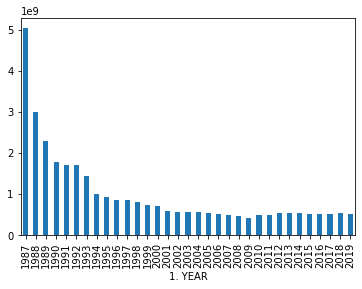

In [22]:
# All chemicals
df_chemical.groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # hey you can do this in one line
### OOOOh a nice decrease with the introduction of the TRI, no longer confounded with the introduction of other industries

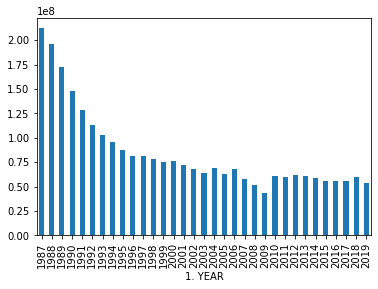

In [23]:
# Carinogens
# start only looking at chemical...
sumDioxChem_year = df_chemical[df_chemical["42. CARCINOGEN"]=="YES"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') 

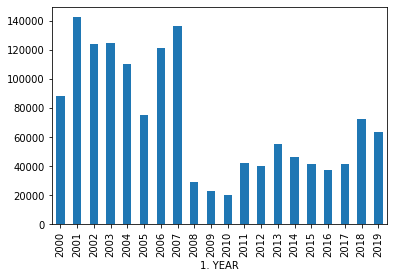

In [24]:
# Dioxins
sumDioxChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="Dioxin"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # Methodology change to more group contribution in 2008
# counfounded by normalizations - take into account

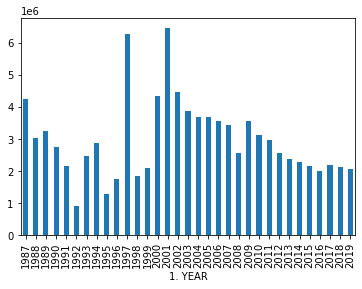

In [25]:
# PBT
sumDioxChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="PBT"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # Methodology change to more group contribution in 2008
# confounded by additions - take into account

### Anaylsis ideas

Glad I restricted to the chemical industry
 - Look into controlling for production increase
 - Start to look at specific sites/companies
     - Case study notable chemicals (PFAS?)
 - Trends in emission types out of what we have
 - Start making own stats
     - Yearly decrease in specific chemical emitted
         - compare with production increase ratio
     - Shift in chemicals compositions within plants
  - Look at state trends


## Do plants get better at controlling emissions?

Ended up not being able to get anything substantial to run here... spent a lot of time trying to control for production ratio

In [26]:
year_location = df_chemical.groupby(["1. YEAR","2. TRIFD"])["101. TOTAL RELEASES"].sum()

year_location

#df_chemical.groupby(["1. YEAR","2. TRIFD"])["116. 8.9 - PRODUCTION RATIO"].sum()

#df_chemical.groupby(["2. TRIFD"])["101. TOTAL RELEASES"].count()

1. YEAR  2. TRIFD       
1987     00613RSTNDROUTE          0.00
         00617BBTTCROADN     305421.00
         00617BRSTLSTATE     970700.00
         00617MRCKSSTATE    1285340.00
         00617PFZRPHIGHW     148450.00
                               ...    
2019     99337KRLYGROUTE       6558.45
         99352DVNCD2101H      81715.00
         9950WNRCLS298CM         10.00
         9973WBRDMD2555S          0.10
         9973WHLLBR285SP          2.30
Name: 101. TOTAL RELEASES, Length: 133468, dtype: float64

In [ ]:
df_chemical.groupby(["1. YEAR","2. TRIFD"])["101. TOTAL RELEASES"].describe()

In [ ]:
#Would want to control by increase in production, ratio is given in last column
#https://www.epa.gov/sites/production/files/2016-05/documents/p2_factsheet_may_2016_final.pdf how to think
df_chemical["116. 8.9 - PRODUCTION RATIO"]

df_chem_prod = df_chemical[df_chemical["116. 8.9 - PRODUCTION RATIO"]!=0] # Can now control by increase in production by facility

In [186]:
specificSite_Chem = df_chem_prod[(df_chem_prod["2. TRIFD"]=="77015FRMNT2239H") & (df_chemical["34. CHEMICAL"]=="Hydrogen cyanide")]
#specificSite_Chem["Normalized Production"] - specificSite_Chem["101. TOTAL RELEASES"] Does not compare between years
specificSite_Chem # Can try to determine a statistic with this

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1. YEAR         2. TRIFD 8. ST 15. PARENT CO NAME  \
78813       1987  77015FRMNT2239H    TX      SYNGENTA CORP   
159775      1988  77015FRMNT2239H    TX      SYNGENTA CORP   
248316      1989  77015FRMNT2239H    TX      SYNGENTA CORP   
337053      1990  77015FRMNT2239H    TX      SYNGENTA CORP   
425600      1991  77015FRMNT2239H    TX      SYNGENTA CORP   
513054      1992  77015FRMNT2239H    TX      SYNGENTA CORP   
597607      1993  77015FRMNT2239H    TX      SYNGENTA CORP   
680554      1994  77015FRMNT2239H    TX      SYNGENTA CORP   
758453      1995  77015FRMNT2239H    TX      SYNGENTA CORP   
836043      1996  77015FRMNT2239H    TX      SYNGENTA CORP   
911786      1997  77015FRMNT2239H    TX      SYNGENTA CORP   
987372      1998  77015FRMNT2239H    TX      SYNGENTA CORP   
1078142     1999  77015FRMNT2239H    TX      SYNGENTA CORP   
1165075     2000  77015FRMNT2239H    TX      SYNGENTA CORP   
1259174     2001  77015FRMNT2239H    TX      SYNGENTA CORP   
1357822     2002  77015FRMNT2239H    TX      SYNGENTA CORP   
1453951     2003  77015FRMNT2239H    TX      SYNGENTA CORP   
1548144     2004  77015FRMNT2239H    TX      SYNGENTA CORP   
1640257     2005  77015FRMNT2239H    TX      SYNGENTA CORP   
1732212     2006  77015FRMNT2239H    TX      SYNGENTA CORP   
1823032     2007  77015FRMNT2239H    TX      SYNGENTA CORP   
1911985     2008  77015FRMNT2239H    TX      SYNGENTA CORP   
1998843     2009  77015FRMNT2239H    TX      SYNGENTA CORP   
2080523     2010  77015FRMNT2239H    TX      SYNGENTA CORP   
2162623     2011  77015FRMNT2239H    TX      SYNGENTA CORP   
2245064     2012  77015FRMNT2239H    TX      SYNGENTA CORP   
2327904     2013  77015FRMNT2239H    TX      SYNGENTA CORP   
2411261     2014  77015FRMNT2239H    TX      SYNGENTA CORP   
2494817     2015  77015FRMNT2239H    TX      SYNGENTA CORP   
2577656     2016  77015FRMNT2239H    TX      SYNGENTA CORP   
2658832     2017  77015FRMNT2239H    TX      SYNGENTA CORP   
2739773     2018  77015FRMNT2239H    TX      SYNGENTA CORP   

        20. INDUSTRY SECTOR      34. CHEMICAL 39. CLASSIFICATION  \
78813             Chemicals  Hydrogen cyanide                TRI   
159775            Chemicals  Hydrogen cyanide                TRI   
248316            Chemicals  Hydrogen cyanide                TRI   
337053            Chemicals  Hydrogen cyanide                TRI   
425600            Chemicals  Hydrogen cyanide                TRI   
513054            Chemicals  Hydrogen cyanide                TRI   
597607            Chemicals  Hydrogen cyanide                TRI   
680554            Chemicals  Hydrogen cyanide                TRI   
758453            Chemicals  Hydrogen cyanide                TRI   
836043            Chemicals  Hydrogen cyanide                TRI   
911786            Chemicals  Hydrogen cyanide                TRI   
987372            Chemicals  Hydrogen cyanide                TRI   
1078142           Chemicals  Hydrogen cyanide                TRI   
1165075           Chemicals  Hydrogen cyanide                TRI   
1259174           Chemicals  Hydrogen cyanide                TRI   
1357822           Chemicals  Hydrogen cyanide                TRI   
1453951           Chemicals  Hydrogen cyanide                TRI   
1548144           Chemicals  Hydrogen cyanide                TRI   
1640257           Chemicals  Hydrogen cyanide                TRI   
1732212           Chemicals  Hydrogen cyanide                TRI   
1823032           Chemicals  Hydrogen cyanide                TRI   
1911985           Chemicals  Hydrogen cyanide                TRI   
1998843           Chemicals  Hydrogen cyanide                TRI   
2080523           Chemicals  Hydrogen cyanide                TRI   
2162623           Chemicals  Hydrogen cyanide                TRI   
2245064           Chemicals  Hydrogen cyanide                TRI   
2327904           Chemicals  Hydrogen cyanide                TRI   
2411261           Chemicals  Hydrogen cyanide             

In [184]:
#specificSite_Chem.reset_index() dont think this is actually needed

index  1. YEAR         2. TRIFD 8. ST 15. PARENT CO NAME  \
0     78813     1987  77015FRMNT2239H    TX      SYNGENTA CORP   
1    159775     1988  77015FRMNT2239H    TX      SYNGENTA CORP   
2    248316     1989  77015FRMNT2239H    TX      SYNGENTA CORP   
3    337053     1990  77015FRMNT2239H    TX      SYNGENTA CORP   
4    425600     1991  77015FRMNT2239H    TX      SYNGENTA CORP   
5    513054     1992  77015FRMNT2239H    TX      SYNGENTA CORP   
6    597607     1993  77015FRMNT2239H    TX      SYNGENTA CORP   
7    680554     1994  77015FRMNT2239H    TX      SYNGENTA CORP   
8    758453     1995  77015FRMNT2239H    TX      SYNGENTA CORP   
9    836043     1996  77015FRMNT2239H    TX      SYNGENTA CORP   
10   911786     1997  77015FRMNT2239H    TX      SYNGENTA CORP   
11   987372     1998  77015FRMNT2239H    TX      SYNGENTA CORP   
12  1078142     1999  77015FRMNT2239H    TX      SYNGENTA CORP   
13  1165075     2000  77015FRMNT2239H    TX      SYNGENTA CORP   
14  1259174     2001  77015FRMNT2239H    TX      SYNGENTA CORP   
15  1357822     2002  77015FRMNT2239H    TX      SYNGENTA CORP   
16  1453951     2003  77015FRMNT2239H    TX      SYNGENTA CORP   
17  1548144     2004  77015FRMNT2239H    TX      SYNGENTA CORP   
18  1640257     2005  77015FRMNT2239H    TX      SYNGENTA CORP   
19  1732212     2006  77015FRMNT2239H    TX      SYNGENTA CORP   
20  1823032     2007  77015FRMNT2239H    TX      SYNGENTA CORP   
21  1911985     2008  77015FRMNT2239H    TX      SYNGENTA CORP   
22  1998843     2009  77015FRMNT2239H    TX      SYNGENTA CORP   
23  2080523     2010  77015FRMNT2239H    TX      SYNGENTA CORP   
24  2162623     2011  77015FRMNT2239H    TX      SYNGENTA CORP   
25  2245064     2012  77015FRMNT2239H    TX      SYNGENTA CORP   
26  2327904     2013  77015FRMNT2239H    TX      SYNGENTA CORP   
27  2411261     2014  77015FRMNT2239H    TX      SYNGENTA CORP   
28  2494817     2015  77015FRMNT2239H    TX      SYNGENTA CORP   
29  2577656     2016  77015FRMNT2239H    TX      SYNGENTA CORP   
30  2658832     2017  77015FRMNT2239H    TX      SYNGENTA CORP   
31  2739773     2018  77015FRMNT2239H    TX      SYNGENTA CORP   

   20. INDUSTRY SECTOR      34. CHEMICAL 39. CLASSIFICATION 42. CARCINOGEN  \
0            Chemicals  Hydrogen cyanide                TRI             NO   
1            Chemicals  Hydrogen cyanide                TRI             NO   
2            Chemicals  Hydrogen cyanide                TRI             NO   
3            Chemicals  Hydrogen cyanide                TRI             NO   
4            Chemicals  Hydrogen cyanide                TRI             NO   
5            Chemicals  Hydrogen cyanide                TRI             NO   
6            Chemicals  Hydrogen cyanide                TRI             NO   
7            Chemicals  Hydrogen cyanide                TRI             NO   
8            Chemicals  Hydrogen cyanide                TRI             NO   
9            Chemicals  Hydrogen cyanide                TRI             NO   
10           Chemicals  Hydrogen cyanide                TRI             NO   
11           Chemicals  Hydrogen cyanide                TRI             NO   
12           Chemicals  Hydrogen cyanide                TRI             NO   
13           Chemicals  Hydrogen cyanide                TRI             NO   
14           Chemicals  Hydrogen cyanide                TRI             NO   
15           Chemicals  Hydrogen cyanide                TRI             NO   
16           Chemicals  Hydrogen cyanide                TRI             NO   
17           Chemicals  Hydrogen cyanide                TRI             NO   
18           Chemicals  Hydrogen cyanide                TRI             NO   
19           Chemicals  Hydrogen cyanide                TRI             NO   
20           Chemicals  Hydrogen cyanide                TRI             NO   
21           Chemicals  Hydrogen cyanide                TRI             NO   
22           Chemicals  Hydrogen 

In [190]:
norm_year_prev = specificSite_Chem["101. TOTAL RELEASES"]/specificSite_Chem["116. 8.9 - PRODUCTION RATIO"]
specificSite_Chem["Normalized Production"] = norm_year_prev
specificSite_Chem["Normalized Difference"] = np.nan
specificSite_Chem


c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1. YEAR         2. TRIFD 8. ST 15. PARENT CO NAME  \
78813       1987  77015FRMNT2239H    TX      SYNGENTA CORP   
159775      1988  77015FRMNT2239H    TX      SYNGENTA CORP   
248316      1989  77015FRMNT2239H    TX      SYNGENTA CORP   
337053      1990  77015FRMNT2239H    TX      SYNGENTA CORP   
425600      1991  77015FRMNT2239H    TX      SYNGENTA CORP   
513054      1992  77015FRMNT2239H    TX      SYNGENTA CORP   
597607      1993  77015FRMNT2239H    TX      SYNGENTA CORP   
680554      1994  77015FRMNT2239H    TX      SYNGENTA CORP   
758453      1995  77015FRMNT2239H    TX      SYNGENTA CORP   
836043      1996  77015FRMNT2239H    TX      SYNGENTA CORP   
911786      1997  77015FRMNT2239H    TX      SYNGENTA CORP   
987372      1998  77015FRMNT2239H    TX      SYNGENTA CORP   
1078142     1999  77015FRMNT2239H    TX      SYNGENTA CORP   
1165075     2000  77015FRMNT2239H    TX      SYNGENTA CORP   
1259174     2001  77015FRMNT2239H    TX      SYNGENTA CORP   
1357822     2002  77015FRMNT2239H    TX      SYNGENTA CORP   
1453951     2003  77015FRMNT2239H    TX      SYNGENTA CORP   
1548144     2004  77015FRMNT2239H    TX      SYNGENTA CORP   
1640257     2005  77015FRMNT2239H    TX      SYNGENTA CORP   
1732212     2006  77015FRMNT2239H    TX      SYNGENTA CORP   
1823032     2007  77015FRMNT2239H    TX      SYNGENTA CORP   
1911985     2008  77015FRMNT2239H    TX      SYNGENTA CORP   
1998843     2009  77015FRMNT2239H    TX      SYNGENTA CORP   
2080523     2010  77015FRMNT2239H    TX      SYNGENTA CORP   
2162623     2011  77015FRMNT2239H    TX      SYNGENTA CORP   
2245064     2012  77015FRMNT2239H    TX      SYNGENTA CORP   
2327904     2013  77015FRMNT2239H    TX      SYNGENTA CORP   
2411261     2014  77015FRMNT2239H    TX      SYNGENTA CORP   
2494817     2015  77015FRMNT2239H    TX      SYNGENTA CORP   
2577656     2016  77015FRMNT2239H    TX      SYNGENTA CORP   
2658832     2017  77015FRMNT2239H    TX      SYNGENTA CORP   
2739773     2018  77015FRMNT2239H    TX      SYNGENTA CORP   

        20. INDUSTRY SECTOR      34. CHEMICAL 39. CLASSIFICATION  \
78813             Chemicals  Hydrogen cyanide                TRI   
159775            Chemicals  Hydrogen cyanide                TRI   
248316            Chemicals  Hydrogen cyanide                TRI   
337053            Chemicals  Hydrogen cyanide                TRI   
425600            Chemicals  Hydrogen cyanide                TRI   
513054            Chemicals  Hydrogen cyanide                TRI   
597607            Chemicals  Hydrogen cyanide                TRI   
680554            Chemicals  Hydrogen cyanide                TRI   
758453            Chemicals  Hydrogen cyanide                TRI   
836043            Chemicals  Hydrogen cyanide                TRI   
911786            Chemicals  Hydrogen cyanide                TRI   
987372            Chemicals  Hydrogen cyanide                TRI   
1078142           Chemicals  Hydrogen cyanide                TRI   
1165075           Chemicals  Hydrogen cyanide                TRI   
1259174           Chemicals  Hydrogen cyanide                TRI   
1357822           Chemicals  Hydrogen cyanide                TRI   
1453951           Chemicals  Hydrogen cyanide                TRI   
1548144           Chemicals  Hydrogen cyanide                TRI   
1640257           Chemicals  Hydrogen cyanide                TRI   
1732212           Chemicals  Hydrogen cyanide                TRI   
1823032           Chemicals  Hydrogen cyanide                TRI   
1911985           Chemicals  Hydrogen cyanide                TRI   
1998843           Chemicals  Hydrogen cyanide                TRI   
2080523           Chemicals  Hydrogen cyanide                TRI   
2162623           Chemicals  Hydrogen cyanide                TRI   
2245064           Chemicals  Hydrogen cyanide                TRI   
2327904           Chemicals  Hydrogen cyanide                TRI   
2411261           Chemicals  Hydrogen cyanide             

In [199]:
specificSite_Chem.iat[5,11]
for i in range(2,32):
    specificSite_Chem.iat[i,16] = specificSite_Chem.iat[i,15]-specificSite_Chem.iat[i-1,11]

In [200]:
specificSite_Chem # Negative normalized difference - actual lb difference accounting for increase in production. Positive indicates increased greater than expected due to production increase

1. YEAR         2. TRIFD 8. ST 15. PARENT CO NAME  \
78813       1987  77015FRMNT2239H    TX      SYNGENTA CORP   
159775      1988  77015FRMNT2239H    TX      SYNGENTA CORP   
248316      1989  77015FRMNT2239H    TX      SYNGENTA CORP   
337053      1990  77015FRMNT2239H    TX      SYNGENTA CORP   
425600      1991  77015FRMNT2239H    TX      SYNGENTA CORP   
513054      1992  77015FRMNT2239H    TX      SYNGENTA CORP   
597607      1993  77015FRMNT2239H    TX      SYNGENTA CORP   
680554      1994  77015FRMNT2239H    TX      SYNGENTA CORP   
758453      1995  77015FRMNT2239H    TX      SYNGENTA CORP   
836043      1996  77015FRMNT2239H    TX      SYNGENTA CORP   
911786      1997  77015FRMNT2239H    TX      SYNGENTA CORP   
987372      1998  77015FRMNT2239H    TX      SYNGENTA CORP   
1078142     1999  77015FRMNT2239H    TX      SYNGENTA CORP   
1165075     2000  77015FRMNT2239H    TX      SYNGENTA CORP   
1259174     2001  77015FRMNT2239H    TX      SYNGENTA CORP   
1357822     2002  77015FRMNT2239H    TX      SYNGENTA CORP   
1453951     2003  77015FRMNT2239H    TX      SYNGENTA CORP   
1548144     2004  77015FRMNT2239H    TX      SYNGENTA CORP   
1640257     2005  77015FRMNT2239H    TX      SYNGENTA CORP   
1732212     2006  77015FRMNT2239H    TX      SYNGENTA CORP   
1823032     2007  77015FRMNT2239H    TX      SYNGENTA CORP   
1911985     2008  77015FRMNT2239H    TX      SYNGENTA CORP   
1998843     2009  77015FRMNT2239H    TX      SYNGENTA CORP   
2080523     2010  77015FRMNT2239H    TX      SYNGENTA CORP   
2162623     2011  77015FRMNT2239H    TX      SYNGENTA CORP   
2245064     2012  77015FRMNT2239H    TX      SYNGENTA CORP   
2327904     2013  77015FRMNT2239H    TX      SYNGENTA CORP   
2411261     2014  77015FRMNT2239H    TX      SYNGENTA CORP   
2494817     2015  77015FRMNT2239H    TX      SYNGENTA CORP   
2577656     2016  77015FRMNT2239H    TX      SYNGENTA CORP   
2658832     2017  77015FRMNT2239H    TX      SYNGENTA CORP   
2739773     2018  77015FRMNT2239H    TX      SYNGENTA CORP   

        20. INDUSTRY SECTOR      34. CHEMICAL 39. CLASSIFICATION  \
78813             Chemicals  Hydrogen cyanide                TRI   
159775            Chemicals  Hydrogen cyanide                TRI   
248316            Chemicals  Hydrogen cyanide                TRI   
337053            Chemicals  Hydrogen cyanide                TRI   
425600            Chemicals  Hydrogen cyanide                TRI   
513054            Chemicals  Hydrogen cyanide                TRI   
597607            Chemicals  Hydrogen cyanide                TRI   
680554            Chemicals  Hydrogen cyanide                TRI   
758453            Chemicals  Hydrogen cyanide                TRI   
836043            Chemicals  Hydrogen cyanide                TRI   
911786            Chemicals  Hydrogen cyanide                TRI   
987372            Chemicals  Hydrogen cyanide                TRI   
1078142           Chemicals  Hydrogen cyanide                TRI   
1165075           Chemicals  Hydrogen cyanide                TRI   
1259174           Chemicals  Hydrogen cyanide                TRI   
1357822           Chemicals  Hydrogen cyanide                TRI   
1453951           Chemicals  Hydrogen cyanide                TRI   
1548144           Chemicals  Hydrogen cyanide                TRI   
1640257           Chemicals  Hydrogen cyanide                TRI   
1732212           Chemicals  Hydrogen cyanide                TRI   
1823032           Chemicals  Hydrogen cyanide                TRI   
1911985           Chemicals  Hydrogen cyanide                TRI   
1998843           Chemicals  Hydrogen cyanide                TRI   
2080523           Chemicals  Hydrogen cyanide                TRI   
2162623           Chemicals  Hydrogen cyanide                TRI   
2245064           Chemicals  Hydrogen cyanide                TRI   
2327904           Chemicals  Hydrogen cyanide                TRI   
2411261           Chemicals  Hydrogen cyanide             

In [164]:
# Should have dropped the NaN, but I like the new Normalized difference metric. Can do anaylsis on it (mean, std...) to see how it shifts
specificSite_Chem["Normalized Difference"].describe()

count      27.000000
mean       15.351577
std       682.756848
min     -1579.636232
25%      -127.400060
50%        10.043956
75%       460.982483
max      1116.985075
Name: Normalized Difference, dtype: float64

In [212]:
df_chem_prod.loc[specificSite_Chem.index,"Normalized Difference"] = specificSite_Chem["Normalized Difference"]  

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## General process for site/chemical statistic:
Collect all years of one site and chemical
Divide total releases by production ratio, call normalized release
Subtract normalized release by actual release of previous year
Then have valid reduction indicator

For rest of dataset:

In [168]:
# Code summary
# specificSite_Chem = df_chem_prod[(df_chem_prod["2. TRIFD"]=="77015FRMNT2239H") & (df_chemical["34. CHEMICAL"]=="Hydrogen cyanide")]
# norm_year_prev = specificSite_Chem["101. TOTAL RELEASES"]/specificSite_Chem["116. 8.9 - PRODUCTION RATIO"]
# specificSite_Chem["Normalized Production"] = norm_year_prev
# specificSite_Chem["Normalized Difference"] = np.nan
# for i in range(2,32):
#    specificSite_Chem.iat[i,18] = specificSite_Chem.iat[i,17]-specificSite_Chem.iat[i-1,13]
    # I just want to say this took me forever to think through

In [169]:
df_chem_prod["Normalized Production"] = df_chem_prod["101. TOTAL RELEASES"]/df_chem_prod["116. 8.9 - PRODUCTION RATIO"] # want to normalize by first emmission?


c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1. YEAR         2. TRIFD 8. ST                 15. PARENT CO NAME  \
5           2019  66542FLXLN6000S    KS                                NaN   
7           2019  77015FRMNT2239H    TX                      SYNGENTA CORP   
8           2019  77015FRMNT2239H    TX                      SYNGENTA CORP   
10          2019  77015FRMNT2239H    TX                      SYNGENTA CORP   
11          2019  3160WCJBND2224C    GA                 CJB INDUSTRIES INC   
...          ...              ...   ...                                ...   
2820086     2018  77571LPRTC2400M    TX   OCCIDENTAL CHEMICAL HOLDING CORP   
2820087     2018  77571LPRTC2400M    TX   OCCIDENTAL CHEMICAL HOLDING CORP   
2820088     2018  60554FNSHSWHEEL    IL     ENGINEERED CUSTOM COATINGS LLC   
2820089     2018  40361MLLNCHIGHW    KY  AVANTOR PERFORMANCE MATERIALS INC   
2820090     2018  40361MLLNCHIGHW    KY  AVANTOR PERFORMANCE MATERIALS INC   

        20. INDUSTRY SECTOR                      34. CHEMICAL  \
5                 Chemicals                           Toluene   
7                 Chemicals  Dioxin and dioxin-like compounds   
8                 Chemicals                 Hexachlorobenzene   
10                Chemicals                    Chlorothalonil   
11                Chemicals                   n-Butyl alcohol   
...                     ...                               ...   
2820086           Chemicals                        Chloroform   
2820087           Chemicals                    Lead compounds   
2820088           Chemicals                 sec-Butyl alcohol   
2820089           Chemicals            Methyl isobutyl ketone   
2820090           Chemicals                    Lead compounds   

        39. CLASSIFICATION 42. CARCINOGEN  45. 5.1 - FUGITIVE AIR  \
5                      TRI             NO             23519.00000   
7                   Dioxin            YES                 0.52882   
8                      PBT            YES                 0.24000   
10                     TRI            YES               340.20000   
11                     TRI             NO                 0.86000   
...                    ...            ...                     ...   
2820086                TRI            YES               731.00000   
2820087                PBT             NO                 0.00000   
2820088                TRI             NO               673.00000   
2820089                TRI            YES                 0.00000   
2820090                PBT             NO                 0.00000   

         59. ON-SITE RELEASE TOTAL  82. OFF-SITE RELEASE TOTAL  \
5                      87107.00000                    0.000000   
7                          5.41933                  278.876856   
8                        322.24900                 7222.748230   
10                      4252.05000               202538.450000   
11                         0.86000                    0.000000   
...                            ...                         ...   
2820086                 1350.10000                    0.210000   
2820087                   62.00000                    0.070000   
2820088                 1346.00000                    0.000000   
2820089                    0.00000                    0.000000   
2820090                    0.00000                    0.000000   

         101. TOTAL RELEASES  116. 8.9 - PRODUCTION RATIO  \
5               87107.000000                         0.95   
7                 284.296186                         1.22   
8                7544.997230                         1.22   
10             206790.500000                         1.22   
11                  0.860000                         1.11   
...                      ...                          ...   
2820086          1350.310000                         0.99   
2820087            62.070000                         1.02   
2820088          1346.000000                         0.08   
2820089             0.000000                         2.19  

In [178]:
df_chem_prod["Normalized Difference"] = np.nan

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
#This is probably pretty darn bad, but hey:

#for i in df_chem_prod["2. TRIFD"]:
#    for j in df_chem_prod[df_chem_prod["2. TRIFD"]==i]["34. CHEMICAL"]:
#        if(df_chem_prod[(df_chem_prod["2. TRIFD"]==i) & (df_chemical["34. CHEMICAL"]==i)].shape[0]==32):
#            specificSite_chem = df_chem_prod[(df_chem_prod["2. TRIFD"]==i) & (df_chemical["34. CHEMICAL"]==i)]
#            for i in range(2,32):
#                specificSite_Chem.iat[i,16] = specificSite_Chem.iat[i,15]-specificSite_Chem.iat[i-1,11]
#            df_chem_prod.loc[specificSite_Chem.index,"Normalized Difference"] = specificSite_Chem["Normalized Difference"]
#
# Gave over an hour to run and no dice... Oh well...

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [217]:
df_chem_prod.dropna(subset=["Normalized Difference"]) # worked for the specific example...

1. YEAR         2. TRIFD 8. ST 15. PARENT CO NAME  \
425600      1991  77015FRMNT2239H    TX      SYNGENTA CORP   
513054      1992  77015FRMNT2239H    TX      SYNGENTA CORP   
597607      1993  77015FRMNT2239H    TX      SYNGENTA CORP   
680554      1994  77015FRMNT2239H    TX      SYNGENTA CORP   
836043      1996  77015FRMNT2239H    TX      SYNGENTA CORP   
911786      1997  77015FRMNT2239H    TX      SYNGENTA CORP   
987372      1998  77015FRMNT2239H    TX      SYNGENTA CORP   
1078142     1999  77015FRMNT2239H    TX      SYNGENTA CORP   
1165075     2000  77015FRMNT2239H    TX      SYNGENTA CORP   
1259174     2001  77015FRMNT2239H    TX      SYNGENTA CORP   
1357822     2002  77015FRMNT2239H    TX      SYNGENTA CORP   
1453951     2003  77015FRMNT2239H    TX      SYNGENTA CORP   
1548144     2004  77015FRMNT2239H    TX      SYNGENTA CORP   
1640257     2005  77015FRMNT2239H    TX      SYNGENTA CORP   
1732212     2006  77015FRMNT2239H    TX      SYNGENTA CORP   
1823032     2007  77015FRMNT2239H    TX      SYNGENTA CORP   
1911985     2008  77015FRMNT2239H    TX      SYNGENTA CORP   
1998843     2009  77015FRMNT2239H    TX      SYNGENTA CORP   
2080523     2010  77015FRMNT2239H    TX      SYNGENTA CORP   
2162623     2011  77015FRMNT2239H    TX      SYNGENTA CORP   
2245064     2012  77015FRMNT2239H    TX      SYNGENTA CORP   
2327904     2013  77015FRMNT2239H    TX      SYNGENTA CORP   
2411261     2014  77015FRMNT2239H    TX      SYNGENTA CORP   
2494817     2015  77015FRMNT2239H    TX      SYNGENTA CORP   
2577656     2016  77015FRMNT2239H    TX      SYNGENTA CORP   
2658832     2017  77015FRMNT2239H    TX      SYNGENTA CORP   
2739773     2018  77015FRMNT2239H    TX      SYNGENTA CORP   

        20. INDUSTRY SECTOR      34. CHEMICAL 39. CLASSIFICATION  \
425600            Chemicals  Hydrogen cyanide                TRI   
513054            Chemicals  Hydrogen cyanide                TRI   
597607            Chemicals  Hydrogen cyanide                TRI   
680554            Chemicals  Hydrogen cyanide                TRI   
836043            Chemicals  Hydrogen cyanide                TRI   
911786            Chemicals  Hydrogen cyanide                TRI   
987372            Chemicals  Hydrogen cyanide                TRI   
1078142           Chemicals  Hydrogen cyanide                TRI   
1165075           Chemicals  Hydrogen cyanide                TRI   
1259174           Chemicals  Hydrogen cyanide                TRI   
1357822           Chemicals  Hydrogen cyanide                TRI   
1453951           Chemicals  Hydrogen cyanide                TRI   
1548144           Chemicals  Hydrogen cyanide                TRI   
1640257           Chemicals  Hydrogen cyanide                TRI   
1732212           Chemicals  Hydrogen cyanide                TRI   
1823032           Chemicals  Hydrogen cyanide                TRI   
1911985           Chemicals  Hydrogen cyanide                TRI   
1998843           Chemicals  Hydrogen cyanide                TRI   
2080523           Chemicals  Hydrogen cyanide                TRI   
2162623           Chemicals  Hydrogen cyanide                TRI   
2245064           Chemicals  Hydrogen cyanide                TRI   
2327904           Chemicals  Hydrogen cyanide                TRI   
2411261           Chemicals  Hydrogen cyanide                TRI   
2494817           Chemicals  Hydrogen cyanide                TRI   
2577656           Chemicals  Hydrogen cyanide                TRI   
2658832           Chemicals  Hydrogen cyanide                TRI   
2739773           Chemicals  Hydrogen cyanide                TRI   

        42. CARCINOGEN  45. 5.1 - FUGITIVE AIR  59. ON-SITE RELEASE TOTAL  \
425600              NO                   114.0                    733.000   
513054              NO                   150.0                   1370.000   
597607              NO                   139.0                    173.000   
680554              NO                   143.0             

### Emission Type



<AxesSubplot:xlabel='1. YEAR'>

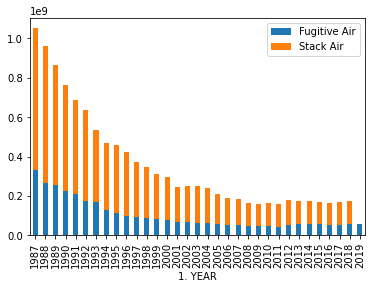

In [38]:
fugAir = df_chemical.groupby(["1. YEAR"])["45. 5.1 - FUGITIVE AIR"].sum()
stackAir = df_chemical.groupby(["1. YEAR"])["46. 5.2 - STACK AIR"].sum()
waterAir = df_chemical.groupby(["1. YEAR"])["47. 5.3 - WATER"].sum()
df_emissionType = pd.concat({"Fugitive Air":fugAir,"Stack Air":stackAir,"Water":waterAir},axis=1)
df_emissionType.plot.bar(y=['Fugitive Air', "Stack Air"], stacked=True)

<AxesSubplot:xlabel='1. YEAR'>

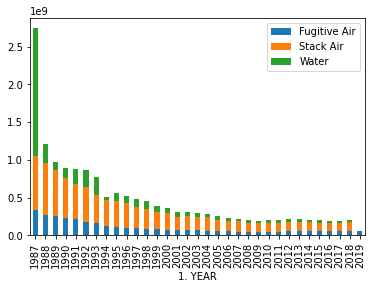

In [39]:
df_emissionType.plot.bar(y=['Fugitive Air', "Stack Air","Water"], stacked=True)

In [59]:
onsite = df_chemical.groupby(["1. YEAR"])["59. ON-SITE RELEASE TOTAL"].sum()*10**-6
offsite = df_chemical.groupby(["1. YEAR"])["82. OFF-SITE RELEASE TOTAL"].sum()*10**-6
df_emissionLocation = pd.concat({"Onsite":onsite,"Offsite":offsite},axis=1)

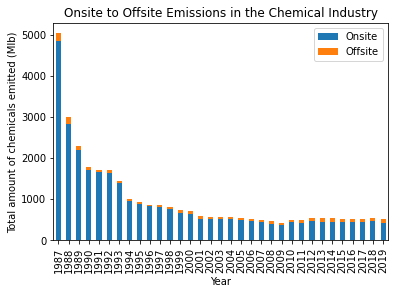

In [60]:
df_emissionLocation.plot.bar(y=['Onsite', "Offsite"], stacked=True)
plt.xlabel("Year")
plt.ylabel("Total amount of chemicals emitted (Mlb)")
plt.title("Onsite to Offsite Emissions in the Chemical Industry")
plt.show()

### State

Kinda want to create my own statistic/value to test/look for trends, lose ability to use the production ratio


In [465]:
year_state = df_chemical.groupby(["1. YEAR","8. ST"])["101. TOTAL RELEASES"].sum()*10**-6
year_state = year_state.reset_index()
year_state

1. YEAR 8. ST  101. TOTAL RELEASES
0        1987    AK            30.648795
1        1987    AL           318.448006
2        1987    AR            43.315868
3        1987    AZ             0.900708
4        1987    CA            33.760506
...       ...   ...                  ...
1667     2019    VT             0.000725
1668     2019    WA             1.847919
1669     2019    WI             2.801838
1670     2019    WV             2.677240
1671     2019    WY             8.310774

[1672 rows x 3 columns]

In [466]:
year_state = year_state.drop(index=year_state[year_state["8. ST"]=="VI"].index) # Not state
year_state = year_state.drop(index=year_state[year_state["8. ST"]=="PR"].index) # Not state
year_state = year_state.drop(index=year_state[year_state["8. ST"]=="DC"].index) # Not state, remove both as small
year_state = year_state.drop(year_state[year_state["8. ST"]=="AK"].index)       # Does not report after 2008
year_state = year_state.drop(year_state[year_state["8. ST"]=="HI"].index)       # Does not report after 2013

In [264]:
year_state.groupby(["1. YEAR"])["101. TOTAL RELEASES"].describe()

count       mean         std       min       25%        50%  \
1. YEAR                                                                
1987      51.0  98.651969  263.201045  0.000078  6.247521  29.261927   
1988      51.0  58.713131  156.087331  0.000015  2.408275  13.222451   
1989      51.0  44.960731  102.990631  0.000275  3.263011  14.485720   
1990      51.0  35.069851   75.566053  0.000280  3.175985  12.490713   
1991      51.0  33.548063   75.670307  0.000261  2.306938  10.026003   
1992      51.0  33.392743   77.320871  0.000005  2.136172   9.373095   
1993      51.0  28.422460   71.605779  0.000005  1.679412   8.697241   
1994      50.0  20.174719   37.309999  0.000337  1.550577   7.388688   
1995      51.0  18.182760   38.941170  0.000000  1.290269   6.596401   
1996      51.0  17.014436   35.564834  0.000000  1.248362   6.071576   
1997      51.0  16.792744   34.293218  0.000000  1.405055   5.902693   
1998      51.0  16.025534   33.626314  0.000000  1.367957   5.702174   
1999      51.0  14.290431   29.902478  0.000005  1.147685   6.063862   
2000      51.0  13.831729   27.932600  0.000005  0.991667   6.612423   
2001      51.0  11.477401   23.204298  0.000005  0.661297   5.286609   
2002      51.0  11.280000   24.535237  0.000005  0.615006   5.032082   
2003      51.0  11.172081   23.061563  0.000005  0.681239   4.944947   
2004      51.0  11.176176   23.176999  0.000005  0.783624   4.861277   
2005      51.0  10.765852   22.935853  0.000005  0.727702   4.108506   
2006      51.0  10.352836   22.067785  0.000005  0.853116   4.983977   
2007      51.0   9.718517   20.544973  0.000010  0.722214   3.491243   
2008      50.0   9.365355   20.294750  0.000010  0.688925   3.452612   
2009      50.0   8.622714   18.749586  0.000010  0.523135   2.991320   
2010      50.0  10.010528   21.028037  0.000010  0.504385   3.333970   
2011      50.0   9.908223   20.629061  0.000001  0.560519   3.287942   
2012      50.0  10.617591   22.159503  0.000010  0.770072   3.878179   
2013      50.0  10.805880   23.929604  0.000002  0.575314   3.594606   
2014      49.0  10.901331   23.379007  0.001035  0.851150   4.539402   
2015      49.0  10.779065   23.506385  0.001022  0.404478   4.128935   
2016      49.0  10.418551   21.980678  0.000946  0.479552   3.516248   
2017      50.0  10.381506   22.652230  0.000010  0.415635   2.952930   
2018      50.0  10.950523   24.267231  0.000010  0.464265   3.310317   
2019      50.0  10.192272   21.842498  0.000012  0.404683   2.830859   

               75%          max  
1. YEAR                          
1987     69.855147  1586.985242  
1988     49.564293   896.550462  
1989     39.388965   599.204794  
1990     27.136848   394.727858  
1991     23.609942   415.286542  
1992     21.291136   431.760729  
1993     17.882197   425.306298  
1994     16.766195   198.044095  
1995     16.017761   235.301007  
1996     13.542578   198.654060  
1997     12.909051   187.600398  
1998     12.547010   194.378700  
1999     12.897750   187.250580  
2000     11.339422   170.825468  
2001     10.368542   145.829246  
2002      9.576489   155.571628  
2003      9.625897   142.442397  
2004      9.357825   143.153225  
2005      9.676133   139.159425  
2006      8.383904   132.463771  
2007      8.208051   119.950988  
2008      7.410803   110.992274  
2009      7.335382   106.125719  
2010      8.257523   113.430248  
2011      8.543478   111.992184  
2012     10.089333   125.471000  
2013      8.970905   141.969581  
2014      7.969909   133.966889  
2015      8.339517   128.254170  
2016      8.413440   114.479015  
2017      8.393016   121.200508  
2018      9.125831   134.699732  
2019      8.581299   116.704864

In [329]:
state_max = year_state.groupby(["8. ST"])["101. TOTAL RELEASES"].max()
state_min = year_state.groupby(["8. ST"])["101. TOTAL RELEASES"].min()
state_max

8. ST
AK      30.648795
AL     318.448006
AR      43.315868
AZ       1.047200
CA      33.760506
CO       2.060062
CT      26.536130
DE      16.361704
FL     166.954143
GA      29.660631
HI       0.011294
IA      28.336561
ID      15.200096
IL      80.770929
IN      79.732855
KS     105.872181
KY      67.681672
LA    1046.660351
MA      17.976020
MD       8.621980
ME       0.588549
MI      36.806758
MN       9.563966
MO      40.348141
MS     127.809650
MT       0.390051
NC      70.147383
ND      26.323792
NE       8.136295
NH      11.165815
NJ      49.080402
NM       8.142592
NV       7.991729
NY      72.028623
OH     131.138677
OK      29.261927
OR       7.081577
PA      35.910688
PR      10.993401
RI      12.233050
SC      40.916142
SD       0.697262
TN     268.182781
TX    1586.985242
UT       7.687555
VA     209.006742
VT       0.064309
WA       9.232441
WI       3.394676
WV     103.237063
WY      54.946381
Name: 101. TOTAL RELEASES, dtype: float64

In [330]:
state_min

8. ST
AK      0.000010
AL      5.625732
AR      2.648290
AZ      0.025477
CA      1.698408
CO      0.234026
CT      0.199508
DE      0.085699
FL     23.385519
GA      6.564317
HI      0.000000
IA      4.509312
ID      2.970535
IL      7.336327
IN      2.880551
KS      4.243338
KY      5.671943
LA     72.316869
MA      0.467278
MD      0.394786
ME      0.004046
MI      2.652962
MN      0.823018
MO      1.046352
MS     22.771174
MT      0.061174
NC      8.603280
ND      0.000005
NE      1.630679
NH      0.009403
NJ      3.330415
NM      0.000690
NV      0.682163
NY      1.788743
OH     27.430901
OK      6.722005
OR      0.992030
PA      2.556696
PR      0.381806
RI      0.022506
SC      6.115390
SD      0.000574
TN     18.411076
TX    106.125719
UT      0.183493
VA      3.796688
VT      0.000725
WA      0.326170
WI      0.476873
WV      2.636861
WY      3.948831
Name: 101. TOTAL RELEASES, dtype: float64

In [331]:
state_percent_decrease = (state_max-state_min)/state_max *100 # Percent decrease in TRI of largest emmission year in comparison to smallest
state_percent_decrease

8. ST
AK     99.999967
AL     98.233391
AR     93.886099
AZ     97.567093
CA     94.969246
CO     88.639836
CT     99.248165
DE     99.476223
FL     85.992849
GA     77.868585
HI    100.000000
IA     84.086594
ID     80.457130
IL     90.917119
IN     96.387247
KS     95.992018
KY     91.619677
LA     93.090703
MA     97.400547
MD     95.421163
ME     99.312514
MI     92.792188
MN     91.394594
MO     97.406690
MS     82.183526
MT     84.316297
NC     87.735423
ND     99.999981
NE     79.957966
NH     99.915790
NJ     93.214370
NM     99.991525
NV     91.464143
NY     97.516621
OH     79.082524
OK     77.028154
OR     85.991402
PA     92.880404
PR     96.526956
RI     99.816023
SC     85.053844
SD     99.917678
TN     93.134878
TX     93.312747
UT     97.613111
VA     98.183461
VT     98.872631
WA     96.467133
WI     85.952334
WV     97.445819
WY     92.813301
Name: 101. TOTAL RELEASES, dtype: float64

In [332]:
state_percent_decrease.describe()

count     51.000000
mean      92.716621
std        6.732347
min       77.028154
25%       88.187630
50%       93.886099
75%       97.898286
max      100.000000
Name: 101. TOTAL RELEASES, dtype: float64

<AxesSubplot:xlabel='1. YEAR'>

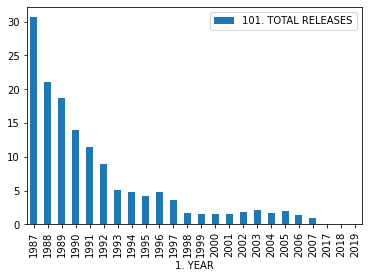

In [333]:
# Alaska is pretty surprising, lets check why:
year_state[year_state["8. ST"]=="AK"].plot.bar(x="1. YEAR",y="101. TOTAL RELEASES") # might be an artifact of the chemical industry itself pullin out of the state
# Stopped reporting in 2008. I guess remove from anaylsis

In [445]:
year_state.drop(year_state[year_state["8. ST"]=="AK"].index)

1. YEAR 8. ST  101. TOTAL RELEASES  Normalized Release  \
1        1987    AL           318.448006                 NaN   
2        1987    AR            43.315868                 NaN   
3        1987    AZ             0.900708                 NaN   
4        1987    CA            33.760506                 NaN   
5        1987    CO             2.060062                 NaN   
...       ...   ...                  ...                 ...   
1667     2019    VT             0.000725                 NaN   
1668     2019    WA             1.847919                 NaN   
1669     2019    WI             2.801838                 NaN   
1670     2019    WV             2.677240                 NaN   
1671     2019    WY             8.310774                 NaN   

      Difference in Release  Ideology score  
1                       NaN             NaN  
2                       NaN             NaN  
3                       NaN             NaN  
4                       NaN             NaN  
5                       NaN             NaN  
...                     ...             ...  
1667                    NaN             NaN  
1668                    NaN             NaN  
1669                    NaN             NaN  
1670                    NaN             NaN  
1671                    NaN             NaN  

[1643 rows x 6 columns]

In [334]:
#Can visualize set with a box and wiskers plot:
df_state_percent = pd.DataFrame(state_percent_decrease)
df_state_percent.columns = ['Percent decrease']
df_state_percent.drop(df_state_percent[])

Percent decrease
8. ST                  
AK            99.999967
AL            98.233391
AR            93.886099
AZ            97.567093
CA            94.969246
CO            88.639836
CT            99.248165
DE            99.476223
FL            85.992849
GA            77.868585
HI           100.000000
IA            84.086594
ID            80.457130
IL            90.917119
IN            96.387247
KS            95.992018
KY            91.619677
LA            93.090703
MA            97.400547
MD            95.421163
ME            99.312514
MI            92.792188
MN            91.394594
MO            97.406690
MS            82.183526
MT            84.316297
NC            87.735423
ND            99.999981
NE            79.957966
NH            99.915790
NJ            93.214370
NM            99.991525
NV            91.464143
NY            97.516621
OH            79.082524
OK            77.028154
OR            85.991402
PA            92.880404
PR            96.526956
RI            99.816023
SC            85.053844
SD            99.917678
TN            93.134878
TX            93.312747
UT            97.613111
VA            98.183461
VT            98.872631
WA            96.467133
WI            85.952334
WV            97.445819
WY            92.813301

<AxesSubplot:ylabel='Percent decrease'>

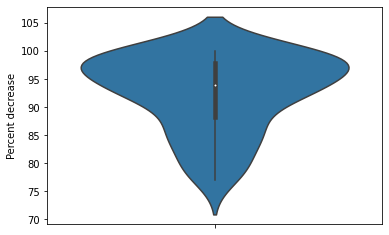

In [335]:
# Violin plots are cooler IMO
import seaborn as sns
sns.violinplot(y='Percent decrease', data = df_state_percent)
# the outliers confuse me tho

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

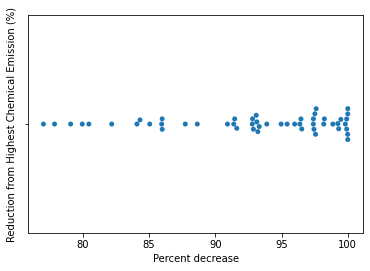

In [336]:
sns.swarmplot(x='Percent decrease', data = df_state_percent)
plt.ylabel("Reduction from Highest Chemical Emission (%)")
plt.xlabel

<AxesSubplot:xlabel='Percent decrease'>

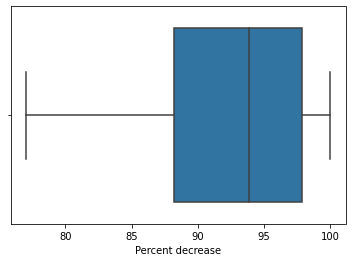

In [337]:
sns.boxplot(x='Percent decrease', data = df_state_percent)

In [338]:
df_state_percent.describe()

Percent decrease
count         51.000000
mean          92.716621
std            6.732347
min           77.028154
25%           88.187630
50%           93.886099
75%           97.898286
max          100.000000

In [349]:
df_state_percent.index.names = ["State"]
df_state_percent

Percent decrease
State                  
AK            99.999967
AL            98.233391
AR            93.886099
AZ            97.567093
CA            94.969246
CO            88.639836
CT            99.248165
DE            99.476223
FL            85.992849
GA            77.868585
HI           100.000000
IA            84.086594
ID            80.457130
IL            90.917119
IN            96.387247
KS            95.992018
KY            91.619677
LA            93.090703
MA            97.400547
MD            95.421163
ME            99.312514
MI            92.792188
MN            91.394594
MO            97.406690
MS            82.183526
MT            84.316297
NC            87.735423
ND            99.999981
NE            79.957966
NH            99.915790
NJ            93.214370
NM            99.991525
NV            91.464143
NY            97.516621
OH            79.082524
OK            77.028154
OR            85.991402
PA            92.880404
PR            96.526956
RI            99.816023
SC            85.053844
SD            99.917678
TN            93.134878
TX            93.312747
UT            97.613111
VA            98.183461
VT            98.872631
WA            96.467133
WI            85.952334
WV            97.445819
WY            92.813301

In [347]:
#Shame
df_state_percent.sort_values(by='Percent decrease', ascending = False)

Percent decrease
8. ST                  
HI           100.000000
ND            99.999981
AK            99.999967
NM            99.991525
SD            99.917678
NH            99.915790
RI            99.816023
DE            99.476223
ME            99.312514
CT            99.248165
VT            98.872631
AL            98.233391
VA            98.183461
UT            97.613111
AZ            97.567093
NY            97.516621
WV            97.445819
MO            97.406690
MA            97.400547
PR            96.526956
WA            96.467133
IN            96.387247
KS            95.992018
MD            95.421163
CA            94.969246
AR            93.886099
TX            93.312747
NJ            93.214370
TN            93.134878
LA            93.090703
PA            92.880404
WY            92.813301
MI            92.792188
KY            91.619677
NV            91.464143
MN            91.394594
IL            90.917119
CO            88.639836
NC            87.735423
FL            85.992849
OR            85.991402
WI            85.952334
SC            85.053844
MT            84.316297
IA            84.086594
MS            82.183526
ID            80.457130
NE            79.957966
OH            79.082524
GA            77.868585
OK            77.028154

In [313]:
#Just realized that instead of min and max I should hardcode the years... Data is more confusing. Lets stick the other way and ankwoledge not ideal...
state_1987 = year_state[year_state["1. YEAR"]==1987]
state_2019 = year_state[year_state["1. YEAR"]==2019]

In [314]:
# bad way to create series I want:
state_emmit_1987 = state_1987.groupby(["8. ST"])["101. TOTAL RELEASES"].max()
state_emmit_2019 = state_2019.groupby(["8. ST"])["101. TOTAL RELEASES"].min()

In [315]:
state_emmit_1987

8. ST
AK      30.648795
AL     318.448006
AR      43.315868
AZ       0.900708
CA      33.760506
CO       2.060062
CT      26.536130
DE      16.361704
FL     166.954143
GA      29.660631
HI       0.004000
IA      20.682711
ID      15.200096
IL      80.770929
IN      79.732855
KS     102.552933
KY      67.681672
LA    1046.660351
MA      17.976020
MD       8.621980
ME       0.588549
MI      36.806758
MN       7.033676
MO      40.348141
MS     127.809650
MT       0.268815
NC      63.843346
ND       0.000078
NE       8.136295
NH      11.165815
NJ      49.080402
NM       0.067815
NV       4.752492
NY      72.028623
OH     131.138677
OK      29.261927
OR       5.461365
PA      35.910688
PR      10.188688
RI      12.233050
SC      40.916142
SD       0.048750
TN     268.182781
TX    1586.985242
UT       1.399801
VA     209.006742
VT       0.017150
WA       9.232441
WI       2.622963
WV     103.237063
WY      54.946381
Name: 101. TOTAL RELEASES, dtype: float64

In [316]:
state_percent_decrease = (state_emmit_1987-state_emmit_2019)/state_emmit_1987 *100

In [317]:
state_percent_decrease

8. ST
AK    9.999996e+01
AL    9.781613e+01
AR    8.928110e+01
AZ    8.179557e+01
CA    9.229860e+01
CO    8.654053e+01
CT    9.854762e+01
DE    9.947622e+01
FL    8.093564e+01
GA    7.583487e+01
HI             NaN
IA    4.900035e+01
ID    2.812636e+01
IL    9.043887e+01
IN    9.008522e+01
KS    9.098814e+01
KY    9.019355e+01
LA    9.047422e+01
MA    9.681591e+01
MD    9.463565e+01
ME    9.803774e+01
MI    9.279219e+01
MN    7.923339e+01
MO    9.303010e+01
MS    7.744480e+01
MT    3.449614e+01
NC    8.239258e+01
ND   -3.335988e+07
NE    7.856328e+01
NH    9.950304e+01
NJ    9.321437e+01
NM    9.898238e+01
NV    3.951339e+01
NY    9.604394e+01
OH    7.575402e+01
OK    6.477496e+01
OR   -2.966679e+01
PA    9.278946e+01
PR    9.625265e+01
RI    9.976841e+01
SC    7.880672e+01
SD   -4.278147e+02
TN    9.313488e+01
TX    9.264613e+01
UT    6.358826e+01
VA    9.743806e+01
VT    9.577259e+01
WA    7.998450e+01
WI   -6.819573e+00
WV    9.740671e+01
WY    8.487476e+01
Name: 101. TOTAL RELEASES

In [ ]:
# More sophisticated: look at each chemical released
chem_year_state = df_chemical.groupby(["1. YEAR","8. ST","34. CHEMICAL"])["101. TOTAL RELEASES"].sum()*10**-6
df_chem_state_year = chem_year_state.reset_index() # the multi-index hurts my head
df_chem_state_year
# too difficult to deal with

## Adding state ideology

Wanted to compare with some measure of a states ideology. Found a measure [here](https://rcfording.com/state-ideology-data/), which gives a nominate measure of state government ideology. The way that this is calculated is delatied [here](https://journals-sagepub-com.udel.idm.oclc.org/doi/10.1177/153244001001000201), but it essentially looks at the votes of a states congressional delegation as well as interest group ratings and extrapolates them to similar party state politicains. Its on a scale of 0-100 going from conservative-liberal.

Note I could not find an easy way to scape, and did some of my own pre-processing in Excel (adding abbreviations, deleting empty rows)

In [450]:
# Dataset on state ideology

df_stIdeology = pd.read_csv("stateideology_v2018.csv") # could not find out how to scrape
df_stIdeology

State  State number  year  Citizen ideology measure  \
0           Alabama             1  1960                 41.192535   
1           Alabama             1  1961                 40.845158   
2           Alabama             1  1962                 40.705376   
3           Alabama             1  1963                 37.155907   
4           Alabama             1  1964                 34.978466   
...             ...           ...   ...                       ...   
2895       Virginia            46  2017                       NaN   
2896     Washington            47  2017                       NaN   
2897  West Virginia            48  2017                       NaN   
2898      Wisconsin            49  2017                       NaN   
2899        Wyoming            50  2017                       NaN   

      State ideology State Abbreviation  
0          60.188404                 AL  
1          60.188404                 AL  
2          60.188404                 AL  
3          60.699196                 AL  
4          60.699196                 AL  
...              ...                ...  
2895       46.937275                 VA  
2896       61.822315                 WA  
2897       42.272385                 WV  
2898       20.984238                 WI  
2899       23.122063                 WY  

[2900 rows x 6 columns]

In [472]:
# Want to create dataset of slopes in yearly emissions and correlate with ideology data
year_state["Normalized Release"] = np.nan
year_state["Difference in Release"]= np.nan
year_state["Ideology score"] = np.nan
year_state["Difference in Ideology score"] = np.nan

In [473]:
year_state

1. YEAR 8. ST  101. TOTAL RELEASES  Normalized Release  \
1        1987    AL           318.448006                 NaN   
2        1987    AR            43.315868                 NaN   
3        1987    AZ             0.900708                 NaN   
4        1987    CA            33.760506                 NaN   
5        1987    CO             2.060062                 NaN   
...       ...   ...                  ...                 ...   
1667     2019    VT             0.000725                 NaN   
1668     2019    WA             1.847919                 NaN   
1669     2019    WI             2.801838                 NaN   
1670     2019    WV             2.677240                 NaN   
1671     2019    WY             8.310774                 NaN   

      Difference in Release  Ideology score  
1                       NaN             NaN  
2                       NaN             NaN  
3                       NaN             NaN  
4                       NaN             NaN  
5                       NaN             NaN  
...                     ...             ...  
1667                    NaN             NaN  
1668                    NaN             NaN  
1669                    NaN             NaN  
1670                    NaN             NaN  
1671                    NaN             NaN  

[1584 rows x 6 columns]

In [474]:
#year_state[year_state["8. ST"]=="AL"]

#year_state[(year_state["8. ST"]=="AL") & (year_state["1. YEAR"]==1998)]["Normalized Release"] = 1
#year_state.loc[((year_state["8. ST"]=="AL") & (year_state["1. YEAR"]==1998)),"Normalized Release"] = 1 # probably what I should have done before

#year_state[(year_state["8. ST"]=="AL") & (year_state["1. YEAR"]==1998)]["101. TOTAL RELEASES"]

In [504]:
pd.options.mode.chained_assignment = None
for state in year_state[year_state["1. YEAR"]==1987]["8. ST"]:
    #print(state) sanity check
    for year in range(1987,2018):
        original_val = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==1987)]["101. TOTAL RELEASES"].values[0]
        current_val = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)]["101. TOTAL RELEASES"].values[0]
        norm_val = current_val/original_val
        year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Normalized Release"] = norm_val
        
        ideology_score = df_stIdeology[(df_stIdeology["year"]==year)&(df_stIdeology["State Abbreviation"]==state)]["State ideology"].values[0]
        year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Ideology score"] = ideology_score
        
        if(year!=1987):
            pre_val = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==(year-1))]["Normalized Release"].values[0]
            difference = norm_val-pre_val
            year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Difference in Release"] = difference
            
            pre_ideology = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==(year-1))]["Ideology score"].values[0]
            id_diff = ideology_score-pre_ideology
            
            year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Difference in Ideology score"] = id_diff

In [520]:
year_state = year_state.drop(year_state[year_state["1. YEAR"]==1987].index) #remove baseline - removes straightlines in dataset
year_state = year_state.dropna()

(0.0, 2.0)

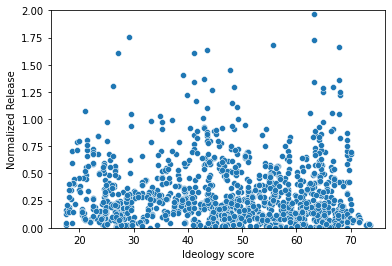

In [521]:

sns.scatterplot(y = "Normalized Release", x = "Ideology score", data = year_state)
plt.ylim(0,2) # some outliers exist above

In [522]:
# Confirm with Pearson R:

stats.pearsonr(year_state["Ideology score"],year_state["Normalized Release"])
# huh I guess a significant, albeit low r 

(-0.06861897067090231, 0.00919504059615393)

(-1.0, 1.0)

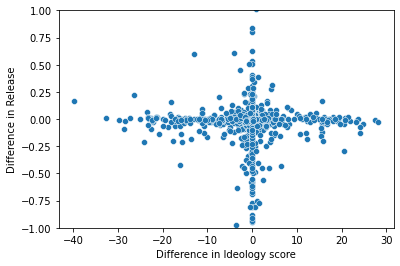

In [523]:
# Know, want to determine if there is any correlation between the yearly difference in release and ideology:
# Lets start with plotting:
sns.scatterplot(y = "Difference in Release", x = "Difference in Ideology score", data = year_state)
plt.ylim(-1, 1)
# Dont see any trend

In [ ]:
stats.pearsonr(year_state["Ideology score"],year_state["Normalized Release"])

Text(0, 0.5, 'Difference in Normalized Release')

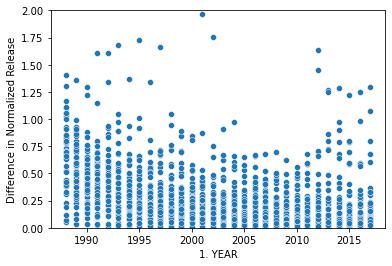

In [513]:
sns.scatterplot(y = "Normalized Release", x = "1. YEAR", data = year_state)
plt.ylim(0,2)
plt.ylabel("Difference in Normalized Release")

In [468]:
year_state[year_state["1. YEAR"]==1987]["8. ST"]

1     AL
2     AR
3     AZ
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
11    IA
12    ID
13    IL
14    IN
15    KS
16    KY
17    LA
18    MA
19    MD
20    ME
21    MI
22    MN
23    MO
24    MS
25    MT
26    NC
27    ND
28    NE
29    NH
30    NJ
31    NM
32    NV
33    NY
34    OH
35    OK
36    OR
37    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VA
46    VT
47    WA
48    WI
49    WV
50    WY
Name: 8. ST, dtype: object